In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns

In [2]:
peak_folder = '/Users/emiliebertholet/cernbox/coldbox_data/selected_waveforms'

with open(f'{peak_folder}/selection_cosmics_wlenNone_prom500.pkl', 'rb') as file:
    dic = pickle.load(file)
cosmics = pd.DataFrame(dic)
print(f"cosmics:  {cosmics.shape[0]} peaks, {cosmics.trigger_record.unique().shape[0]} trigger records")

with open(f'{peak_folder}/selection_PNS_wlenNone_prom500.pkl', 'rb') as file:
    dic = pickle.load(file)
PNS = pd.DataFrame(dic)
print(f"PNS:  {PNS.shape[0]} peaks, {PNS.trigger_record.unique().shape[0]} trigger records")

with open(f'{peak_folder}/selection_PNS_neutrons_wlenNone_prom500.pkl', 'rb') as file:
    dic = pickle.load(file)
PNS_neutrons = pd.DataFrame(dic)
print(f"PNS_neutrons:  {PNS_neutrons.shape[0]} peaks, {PNS_neutrons.trigger_record.unique().shape[0]} trigger records")

with open(f'{peak_folder}/selection_PNS_SideBand_wlenNone_prom500.pkl', 'rb') as file:
    dic = pickle.load(file)
PNS_SB = pd.DataFrame(dic)
print(f"PNS_SB:  {PNS_SB.shape[0]} peaks, {PNS_SB.trigger_record.unique().shape[0]} trigger records")


# cosmics, 25150 peaks, 4189 trigger records
# PNS, 46228 peaks, 14283 trigger records
# PNS_neutrons, 3780 peaks, 3187 trigger records
# PNS_SB, 39102 peaks, 13893 trigger records



# cosmics.keys()

cosmics:  25150 peaks, 4189 trigger records
PNS:  46228 peaks, 14283 trigger records
PNS_neutrons:  3780 peaks, 3187 trigger records
PNS_SB:  39102 peaks, 13893 trigger records


In [3]:
def pad_waveforms(input_data, pad_length=500):
    output_data = input_data
    output_data['waveform_padded'] = [np.pad(wf, (0, pad_length - len(wf))) if len(wf) < pad_length else wf[:pad_length] for wf in output_data['waveform']]
    return output_data

cosmics      = pad_waveforms(cosmics, 500)
PNS          = pad_waveforms(PNS, 500)
PNS_neutrons = pad_waveforms(PNS_neutrons, 500)
PNS_SB       = pad_waveforms(PNS_SB, 500)

In [4]:
cosmics.head()

,trigger_record,waveform_index,height,width,pedestal,waveform,waveform_padded
0,0,0,419,195.350000,1303,"[-92, -84, -75, -84, -85, -77, -69, -66, -51, ...","[-92, -84, -75, -84, -85, -77, -69, -66, -51, ..."
1,0,1,1148,166.122199,1303,"[-2, 41, 161, 322, 488, 619, 738, 806, 859, 88...","[-2, 41, 161, 322, 488, 619, 738, 806, 859, 88..."
2,0,2,2252,192.744797,1303,"[89, 391, 788, 1155, 1487, 1780, 1994, 2125, 2...","[89, 391, 788, 1155, 1487, 1780, 1994, 2125, 2..."
3,0,3,462,169.719328,1303,"[-44, -27, 5, 94, 176, 242, 294, 337, 364, 388...","[-44, -27, 5, 94, 176, 242, 294, 337, 364, 388..."
4,0,4,558,146.478022,1303,"[-30, -16, 10, 65, 151, 252, 340, 374, 401, 47...","[-30, -16, 10, 65, 151, 252, 340, 374, 401, 47..."


In [22]:
def promptFrac(waveforms, promptLim):
    ratio, TotalIntegral, promptInt = [], [], []
    for wf in waveforms:
        tot_int = np.sum(wf)
        pf = np.sum(wf[:promptLim])

        ratio.append( pf/tot_int )
        TotalIntegral.append( tot_int )
        promptInt.append( pf )
    return np.array(ratio), np.array(TotalIntegral), np.array(promptInt)

In [23]:
threshold = 5000
mu_avg = np.mean(cosmics.query(f'height<{threshold}')['waveform_padded'], axis=0)
n_avg = np.mean(PNS_neutrons.query(f'height<{threshold}')['waveform_padded'], axis=0)
sb_avg = np.mean(PNS_SB.query(f'height<{threshold}')['waveform_padded'], axis=0)

In [26]:
print(promptFrac([mu_avg], 50))
print(promptFrac([n_avg], 50))
print(promptFrac([sb_avg], 50))

(array([0.51218311]), array([98985.49554575]), array([50698.69849507]))
(array([0.49732184]), array([94730.71319366]), array([47111.65232163]))
(array([0.5182339]), array([93777.48578304]), array([48598.67242905]))


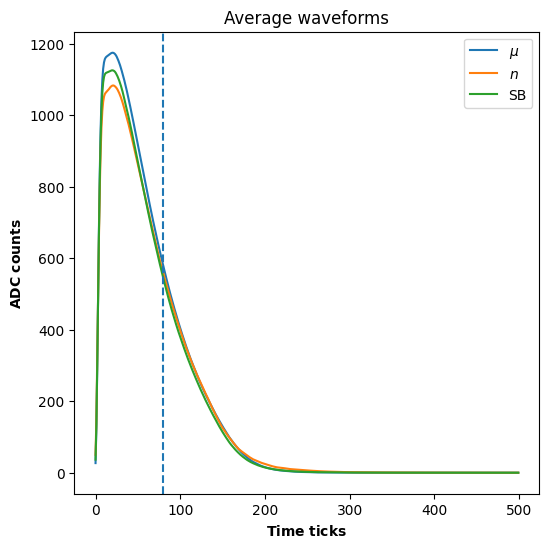

In [7]:
rg = None
# rg = (0e6, 0.5e6)
den = True
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(mu_avg.transpose(), label = r'$\mu$') 
ax.plot(n_avg.transpose(), label = r'$n$') 
ax.plot(sb_avg.transpose(), label = r'SB') 
ax.axvline(x = 80, linestyle='--')
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(r"Average waveforms");
ax.legend();

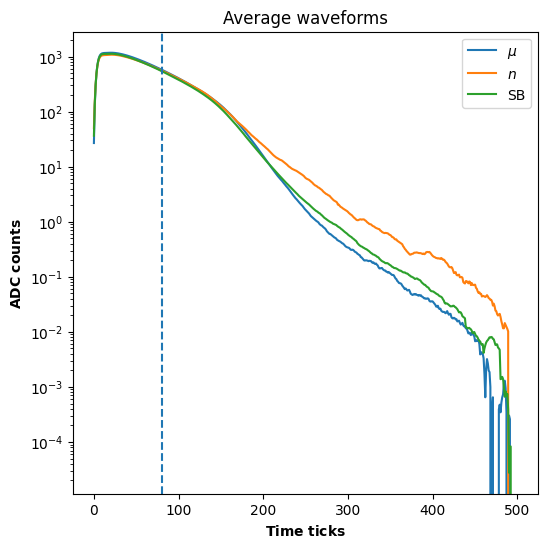

In [8]:
rg = None
# rg = (0e6, 0.5e6)
den = True
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(mu_avg.transpose(), label = r'$\mu$') 
ax.plot(n_avg.transpose(), label = r'$n$') 
ax.plot(sb_avg.transpose(), label = r'SB') 
ax.axvline(x = 80, linestyle='--')
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(r"Average waveforms");
ax.set_yscale('log');
ax.legend();

In [9]:
def compute_correlations(waveforms, average_waveform):
    rms = np.sqrt(np.mean((waveforms - average_waveform)**2, axis=1))
    correlations = [np.corrcoef(w, average_waveform)[0, 1] for w in waveforms]
    return rms, correlations

In [10]:
# waveforms = np.stack(PNS_neutrons['waveform_padded'].values)
waveforms = np.stack(PNS_SB['waveform_padded'].values)
rms_nn, corr_nn  = compute_correlations(waveforms, n_avg)
rms_sb, corr_sb  = compute_correlations(waveforms, sb_avg)
rms_mu, corr_mu  = compute_correlations(waveforms, mu_avg)

In [11]:
# # print(corr_nn[0], corr_sb[0], corr_mu[0])
# n_like = []
# for i in range(0, len(corr_nn)):
#     if corr_nn[i]>corr_mu[i]:
#         n_like.append(1)
#     else:
#         n_like.append(0)



In [12]:

# plt.hist(n_like, bins=2, label='SB');
# plt.xlabel('neutron likeliness')
# plt.legend();

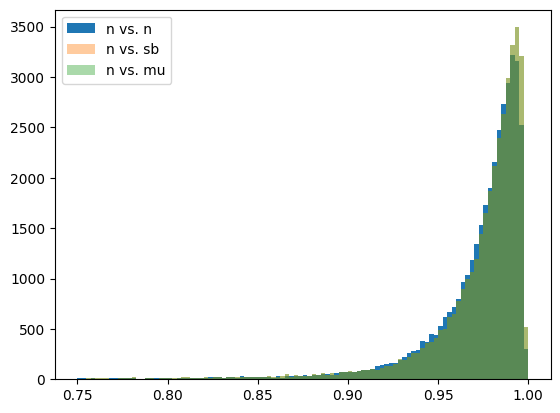

In [13]:


rg = None;
rg = (0.75, 1.00)
plt.hist(corr_nn, bins=100, label='n vs. n', range=rg);
plt.hist(corr_sb, bins=100, label='n vs. sb', alpha = 0.4, range=rg);
plt.hist(corr_sb, bins=100, label='n vs. mu', alpha = 0.4, range=rg);
# plt.hist(rms_nn, bins=100, label='n vs. n');
# plt.hist(rms_sb, bins=100, label='n vs. sb', alpha = 0.4);
plt.legend();


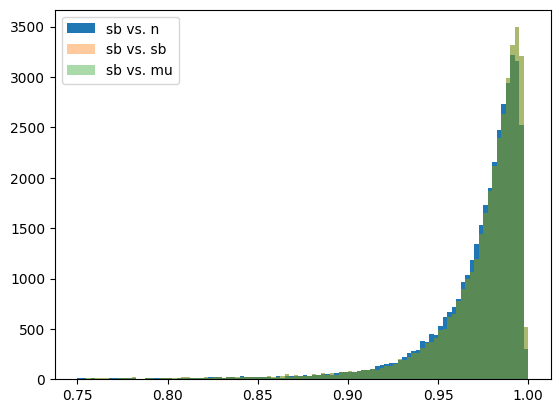

In [14]:
waveforms = np.stack(PNS_SB['waveform_padded'].values)
rms_nn, corr_nn  = compute_correlations(waveforms, n_avg)
rms_sb, corr_sb  = compute_correlations(waveforms, sb_avg)
rms_mu, corr_mu  = compute_correlations(waveforms, mu_avg)

rg = None;
rg = (0.75, 1.00)
plt.hist(corr_nn, bins=100, label='sb vs. n', range=rg);
plt.hist(corr_sb, bins=100, label='sb vs. sb', alpha = 0.4, range=rg);
plt.hist(corr_sb, bins=100, label='sb vs. mu', alpha = 0.4, range=rg);
# plt.hist(rms_nn, bins=100, label='n vs. n');
# plt.hist(rms_sb, bins=100, label='n vs. sb', alpha = 0.4);
plt.legend();


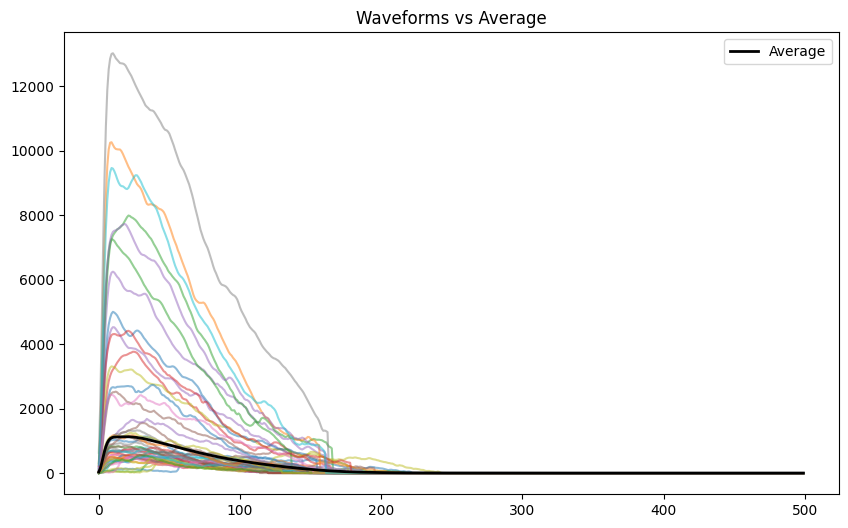

In [15]:
waveforms = np.stack(PNS_SB['waveform_padded'].values)
average_waveform = sb_avg
plt.figure(figsize=(10, 6))
for w in waveforms[:50]:
    plt.plot(w, alpha=0.5)
plt.plot(average_waveform, color='black', linewidth=2, label='Average')
plt.title('Waveforms vs Average')
plt.legend()
plt.show()

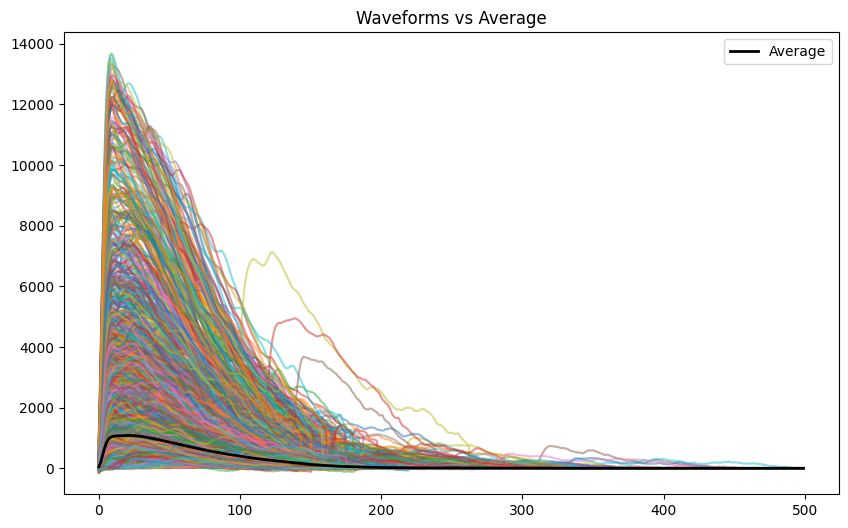

In [16]:
waveforms = np.stack(PNS_neutrons['waveform_padded'].values)
average_waveform = n_avg
plt.figure(figsize=(10, 6))
for w in waveforms[:4000]:
    plt.plot(w, alpha=0.5)
plt.plot(average_waveform, color='black', linewidth=2, label='Average')
plt.title('Waveforms vs Average')
plt.legend()
plt.show()

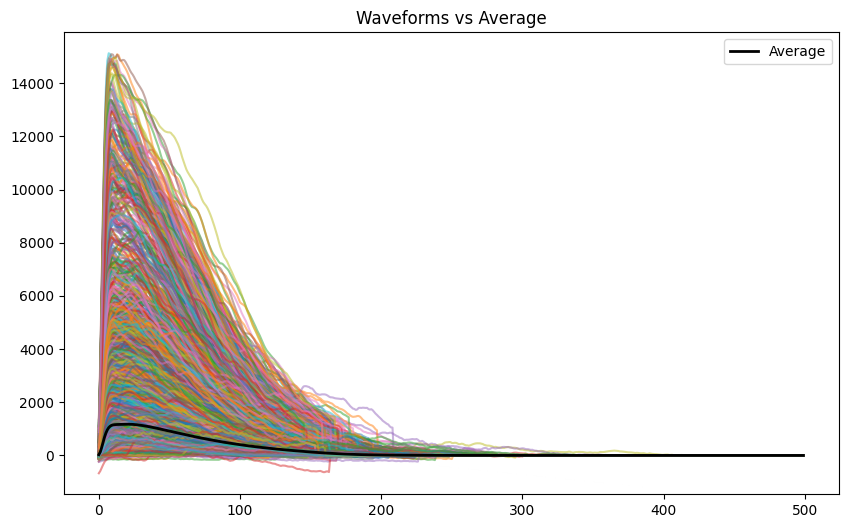

In [17]:
waveforms = np.stack(cosmics['waveform_padded'].values)
average_waveform = mu_avg
plt.figure(figsize=(10, 6))
for w in waveforms[:4000]:
    plt.plot(w, alpha=0.5)
plt.plot(average_waveform, color='black', linewidth=2, label='Average')
plt.title('Waveforms vs Average')
plt.legend()
plt.show()

In [18]:
mu_avg_norm = mu_avg/np.sum(mu_avg)
n_avg_norm  = n_avg/np.sum(n_avg)
sb_avg_norm = sb_avg/np.sum(sb_avg)

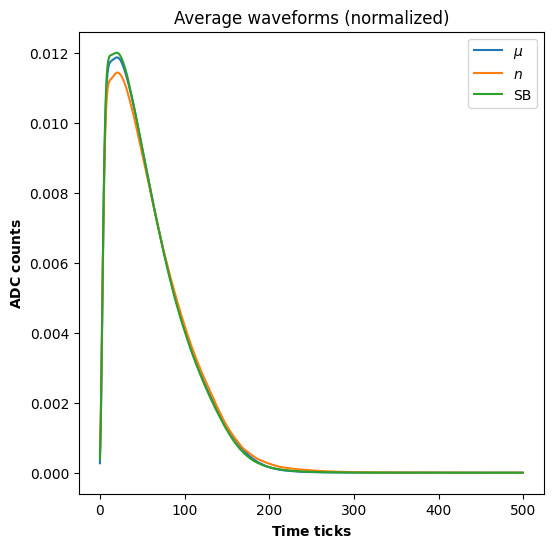

In [19]:

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(mu_avg_norm.transpose(), label = r'$\mu$') 
ax.plot(n_avg_norm.transpose(), label = r'$n$') 
ax.plot(sb_avg_norm.transpose(), label = r'SB') 
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(r"Average waveforms (normalized)");
ax.legend();

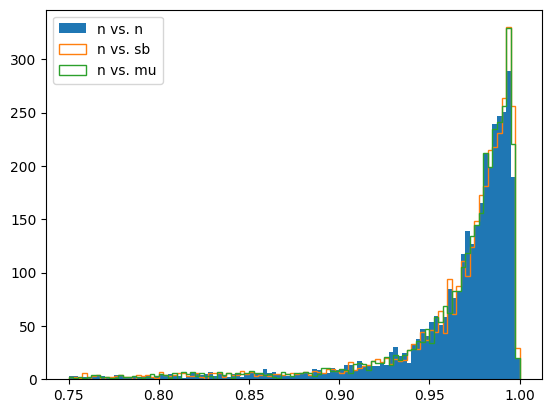

In [21]:
waveforms = np.stack(PNS_neutrons['waveform_padded'].values) 
waveforms_sum = waveforms.sum(axis=1, keepdims=True)
waveforms_norm = waveforms/waveforms_sum

rms_nn, corr_nn  = compute_correlations(waveforms_norm, n_avg_norm)
rms_sb, corr_sb  = compute_correlations(waveforms_norm, sb_avg_norm)
rms_mu, corr_mu  = compute_correlations(waveforms_norm, mu_avg_norm)

rg = None;
rg = (0.75, 1.00)
plt.hist(corr_nn, bins=100, label='n vs. n', range=rg);
plt.hist(corr_sb, bins=100, label='n vs. sb', histtype='step', range=rg);
plt.hist(corr_mu, bins=100, label='n vs. mu', histtype='step', range=rg);
# plt.hist(rms_nn, bins=100, label='n vs. n');
# plt.hist(rms_sb, bins=100, label='n vs. sb', alpha = 0.4);
plt.legend();


In [22]:
# waveforms = np.stack(PNS_SB['waveform_padded'].values) 
# waveforms_sum = waveforms.sum(axis=1, keepdims=True)
# waveforms_norm = waveforms/waveforms_sum
# average_waveform = sb_avg_norm
# plt.figure(figsize=(10, 6))
# for w in waveforms_norm[:500]:
#     plt.plot(w, alpha=0.5)
# # plt.plot(average_waveform, color='black', linewidth=2, label='Average')
# plt.title('Waveforms vs Average')
# plt.legend()
# plt.show()

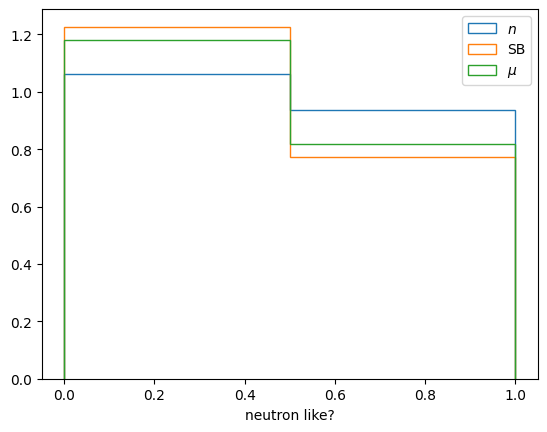

In [23]:
# waveforms = np.stack(PNS_neutrons['waveform_padded'].values)
# waveforms = np.stack(PNS_SB['waveform_padded'].values)
# rms_nn, corr_nn  = compute_correlations(waveforms, n_avg)
# # rms_sb, corr_sb  = compute_correlations(waveforms, sb_avg)
# rms_mu, corr_mu  = compute_correlations(waveforms, mu_avg)

def neutronLike(waveforms):
    _, corr_nn  = compute_correlations(waveforms, n_avg)
    _, corr_mu  = compute_correlations(waveforms, mu_avg)
    n_like = []
    for i in range(0, len(corr_nn)):
        if corr_nn[i]>corr_mu[i]:
            n_like.append(1)
        else:
            n_like.append(0)
    return n_like

n_like_sb = neutronLike(np.stack(PNS_SB['waveform_padded'].values))
n_like_n  = neutronLike(np.stack(PNS_neutrons['waveform_padded'].values))
n_like_mu = neutronLike(np.stack(cosmics['waveform_padded'].values))


plt.hist(n_like_n, bins=2, label=r'$n$', histtype='step', density=True);
plt.hist(n_like_sb, bins=2, label='SB', histtype='step', density=True);
plt.hist(n_like_mu, bins=2, label=r'$\mu$', histtype='step', density=True);
plt.xlabel('neutron like?')
plt.legend();

In [ ]:
def promptFrac(waveforms, promptLim):
    ratio, TotalIntegral, promptInt = [], [], []
    for wf in waveforms:
        tot_int = np.sum(wf)
        pf = np.sum(wf[:promptLim])

        ratio.append( pf/tot_int )
        TotalIntegral.append( tot_int )
        promptInt.append( pf )
    return np.array(ratio), np.array(TotalIntegral), np.array(promptInt)
     
        
    # integral

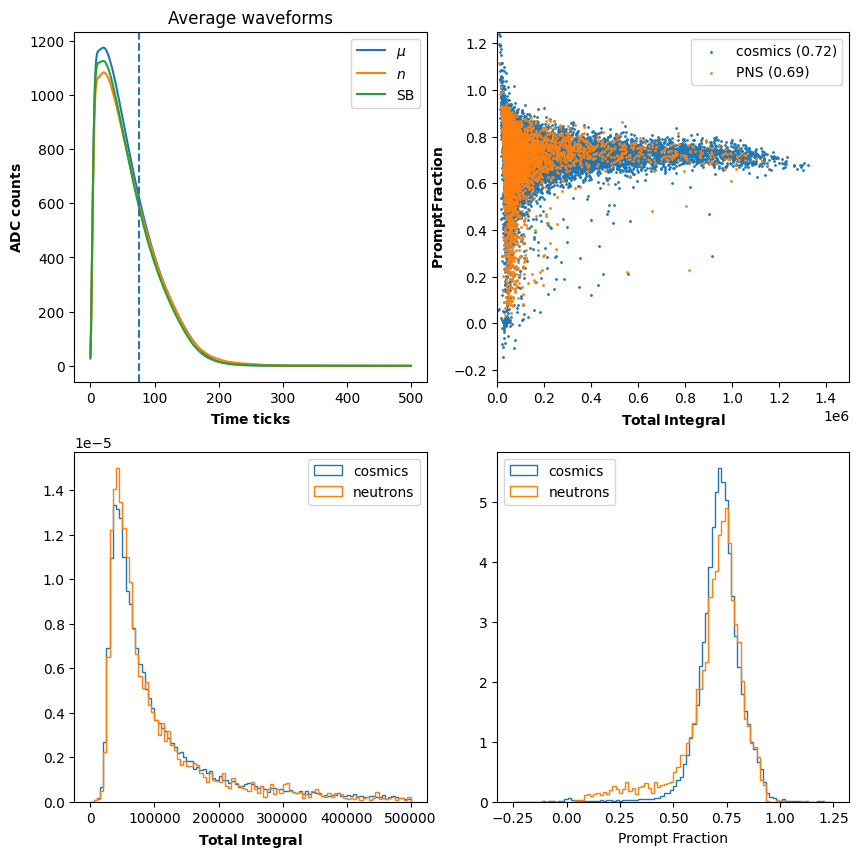

In [25]:
lim = 75

threshold = -20000

# PF_cr, tot_cr, P_cr = promptFrac(np.stack(PNS_SB.query(f'height>{threshold}')['waveform_padded'].values), lim)
PF_cr, tot_cr, P_cr = promptFrac(np.stack(cosmics.query(f'height>{threshold}')['waveform_padded'].values), lim)
PF_n, tot_n, P_n    = promptFrac(np.stack(PNS_neutrons.query(f'height>{threshold}')['waveform_padded'].values), lim)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

ax = axs.flatten()[0]
ax.plot(mu_avg.transpose(), label = r'$\mu$') 
ax.plot(n_avg.transpose(), label = r'$n$') 
ax.plot(sb_avg.transpose(), label = r'SB') 
ax.axvline(x = lim, linestyle='--')
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(r"Average waveforms");
ax.legend();

ax = axs.flatten()[1]
ax.scatter(tot_cr, PF_cr,  s=1, label=f'cosmics ({PF_cr.mean():.2f})')
ax.scatter(tot_n, PF_n,  s=1, label=f'PNS ({PF_n.mean():.2f})')
ax.set_xlabel(r"$\mathrm{\bf Total \, Integral}$")
ax.set_ylabel(r"$\mathrm{\bf Prompt Fraction}$");
ax.set_ylim(-0.25, 1.25);
ax.set_xlim(0, 1.5e6);
ax.legend();


ax = axs.flatten()[2]
rg = (0, 500000)
ax.hist(tot_cr, bins = 100, label=f'cosmics', density=True, histtype='step', range=rg)
ax.hist(tot_n,  bins = 100, label=f'neutrons', density=True, histtype='step', range=rg)
ax.set_xlabel(r"$\mathrm{\bf Total \, Integral}$")
ax.legend();

ax = axs.flatten()[3]
rg = (-0.25, 1.25)
ax.hist(PF_cr, bins = 100, label=f'cosmics', density=True, histtype='step', range=rg)
ax.hist(PF_n,  bins = 100, label=f'neutrons', density=True, histtype='step', range=rg)
ax.set_xlabel(r"Prompt Fraction")
ax.legend(loc='upper left');


In [26]:
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# ax.scatter(tot_cr, PF_cr,  s=1, label=f'cosmics ({PF_cr.mean():.2f})')
# ax.scatter(tot_n, PF_n,  s=1, label=f'PNS ({PF_n.mean():.2f})')

# ax.set_xlabel(r"$\mathrm{\bf Total \, Integral}$")
# ax.set_ylabel(r"$\mathrm{\bf Prompt Fraction}$");
# ax.set_ylim(-0.25, 1.25);
# ax.set_xlim(0, 1.5e6);
# ax.legend();